<font size = 5 >  Logistic Regression Residuals</font> <br>

In [1]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
#Read in data
df = readr::read_csv("loan_dataset.csv", show_col_types = FALSE)
head(df)

Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Male,Yes,1,Graduate,No,4583,128,360,1,Rural,0
Male,Yes,0,Graduate,Yes,3000,66,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2583,120,360,1,Urban,1
Male,No,0,Graduate,No,6000,141,360,1,Urban,1
Male,Yes,2,Graduate,Yes,5417,267,360,1,Urban,1
Male,Yes,0,Not Graduate,No,2333,95,360,1,Urban,1


In [3]:
#fitting the model
glm_model <- glm(formula = Loan_Status ~ .,
                data = df,
                family = binomial()
                )
summary(glm_model)


Call:
glm(formula = Loan_Status ~ ., family = binomial(), data = df)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -2.453e+00  9.280e-01  -2.643  0.00821 ** 
GenderMale              2.639e-01  3.264e-01   0.808  0.41884    
MarriedYes              5.753e-01  2.924e-01   1.968  0.04911 *  
Dependents1            -3.533e-01  3.455e-01  -1.023  0.30644    
Dependents2             2.752e-01  3.777e-01   0.729  0.46618    
Dependents3+            2.100e-01  4.841e-01   0.434  0.66444    
EducationNot Graduate  -3.914e-01  3.018e-01  -1.297  0.19472    
Self_EmployedYes       -1.576e-01  3.515e-01  -0.448  0.65394    
ApplicantIncome         1.485e-05  2.674e-05   0.555  0.57861    
LoanAmount             -3.233e-03  1.710e-03  -1.890  0.05871 .  
Loan_Amount_Term       -8.775e-04  2.024e-03  -0.434  0.66457    
Credit_History          3.648e+00  4.331e-01   8.424  < 2e-16 ***
Property_AreaSemiurban  9.802e-01  3.032e-01   3.233  0.0

In [4]:
#predicting probabilities
predictions <- predict(object = glm_model,
                        newdata = df,
                        type = "response"
                        )
#Compare observed and predicted values
table_full <- table(observed = df$Loan_Status, 
                    predicted = as.numeric(predictions > 0.5))
table_full

        predicted
observed   0   1
       0  65  83
       1   7 325

**Run a Chi-squared test on the classifications and the observed dependent variable.**

In [5]:
#Chi-Squared test
chisq.test(table_full)


	Pearson's Chi-squared test with Yates' continuity correction

data:  table_full
X-squared = 137.09, df = 1, p-value < 2.2e-16


The p-value in our chi-squared test is small so we reject the null that our model is not good in predicting strokes.

**Run the Hosmer-Lemeshow test.**

In [6]:
# Hosmer-Lemeshow test
ResourceSelection::hoslem.test(
  x = df$Loan_Status,
  y = predictions
)


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  df$Loan_Status, predictions
X-squared = 16.519, df = 8, p-value = 0.03553


The p-value of Hosmer-Lemeshow test is small so we reject the null hypothesis. Therefore our model has lack-of-fit.

**Extract the psuedo-R^2 statistic.**

In [7]:
# McFadden's R-squared
glm_null <- glm(
  formula = Loan_Status ~ 1,
  family = binomial(),
  data = df
)
L0 <- logLik(
  object = glm_null
)
Lm <- logLik(
  object = glm_model
)
R2_McFadden <- 1 - (as.numeric(Lm) / as.numeric(L0))
R2_McFadden

[1] 0.2628908

In [8]:
performance::r2_mcfadden(
  model = glm_model
)

# R2 for Generalized Linear Regression
       R2: 0.263
  adj. R2: 0.260

McFadden's pseudo-R-squared ranges from 0 to 1, where 0 indicates that the model does not fit better than the null model, and 1 indicates a perfect fit. In our case the model with 0.2 R-squared is not very good. 

**Extract the response residuals.**

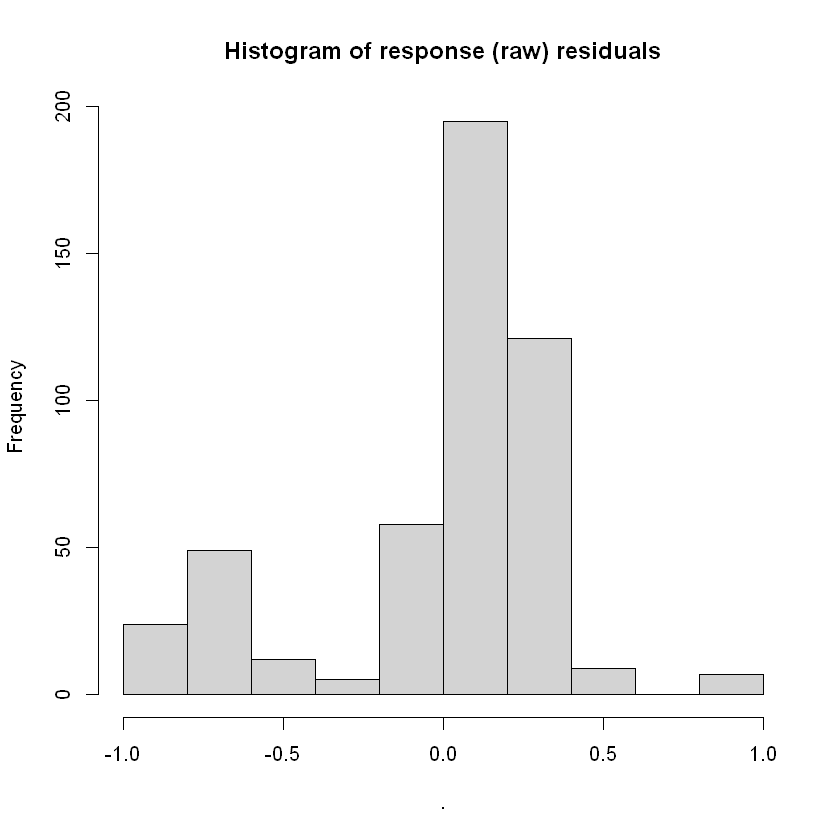

In [9]:
residuals(object = glm_model,
          type = "response") %>%
hist(main = "Histogram of response (raw) residuals")

We see than the residuals are mainly a little more than 0, which is a good sign that our model did not predict very far from the actual values.